In [30]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import os


In [31]:
class MyDataset(datasets.ImageFolder):
    def __init__(self, root, transform):
        super(MyDataset, self).__init__(root, transform)

    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return sample, target


data_dir='./Cat_Dog_data/'
train_dir = os.path.join(data_dir, 'train/')
#valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')
num_workers = 0
 # how many samples per batch to load
batch_size = 20
input_size =224*224*3
output_size = 2
 # define training, valid and test data directories
    
train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.ToTensor(),
                                    ])

#transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225] transforms.Normalize([0.485, 0.456, 0.406],
                                                         #[0.229, 0.224, 0.225])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.ToTensor(),
                                    ])


train_data = MyDataset(train_dir, transform=train_transform)
test_data = MyDataset(test_dir, transform=test_transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers, shuffle=True)
    
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers)


In [32]:
iter(train_loader).next()[0].size()

torch.Size([20, 3, 224, 224])

In [33]:

# constant for classes
classes = ('Dog', 'Cat')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [34]:
# class CNN1(nn.Module):
#     def __init__(self, input_size, n_feature, output_size):
#         super(CNN1, self).__init__()
#         self.n_feature = n_feature
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=5)
#         self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
#         self.fc1 = nn.Linear(n_feature*53*53, 50)
#         self.fc2 = nn.Linear(50, 2)
        
#     def forward(self, x, verbose=False):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
#         x = x.view(-1, self.n_feature*53*53)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.fc2(x)
#         x = F.log_softmax(x, dim=1)
#         return x
    
    
class CNN2(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN2, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.conv3 = nn.Conv2d(n_feature,n_feature, kernel_size=5)
        self.conv4 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.conv5 = nn.Conv2d(n_feature,n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*3*3, 50)
        self.fc2 = nn.Linear(50, 2)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv5(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*3*3)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x    

In [35]:
criterion = nn.CrossEntropyLoss()

n_features = 6 # number of feature maps
   
net = CNN2(input_size, n_features, output_size)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [36]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/cat_dog_experiment_1')

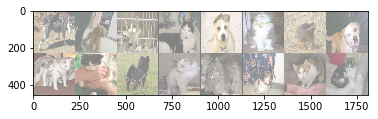

In [37]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images[:16])

# show images
matplotlib_imshow(img_grid, one_channel=False)

# write to tensorboard
writer.add_image('four_cat_dog_images', img_grid)


In [14]:
#!tensorboard --logdir=runs

W0120 10:04:11.860115 140178748344064 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0120 10:04:11.860270 140178748344064 plugin_event_accumulator.py:322] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
TensorBoard 1.14.0 at http://aims-pc:6007/ (Press CTRL+C to quit)
^C


In [38]:
writer.add_graph(net, images)
writer.close()

In [39]:
TrainData=torch.utils.data.DataLoader(train_data, batch_size = 500,num_workers=num_workers, shuffle=True)

# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices

Img, Lab = iter(TrainData).next()

images, labels = select_n_random(Img, Lab)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 224 * 224 * 3)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images)
writer.close()

In [28]:
#!tensorboard --version

1.14.0


In [40]:
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=False)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [43]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 0 and i>1:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 10.0,
                            epoch * len(train_loader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(train_loader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


In [44]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
class_probs = []
class_preds = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 1 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)
